# Question 1

## Part (i)


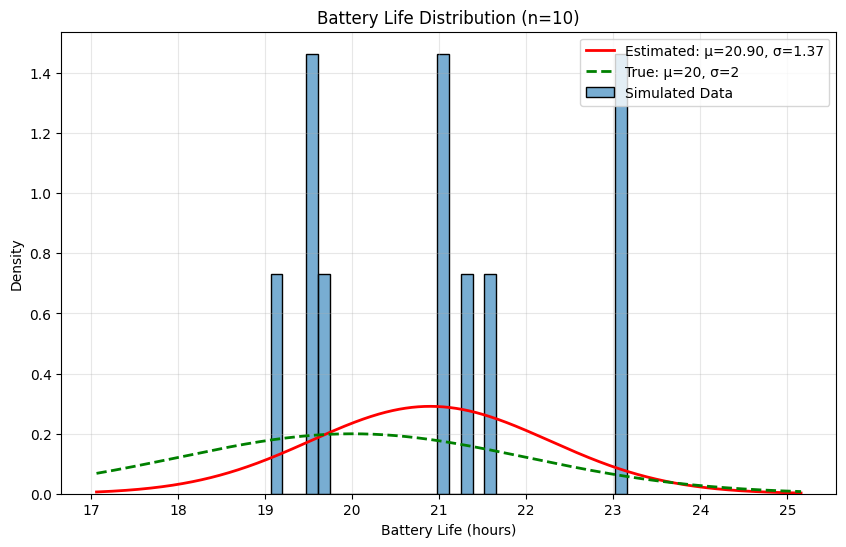

Sample size n1 = 10
MLE Mean: 20.8961 (True: 20)
MLE Std Dev: 1.3718 (True: 2)
--------------------------------------------------


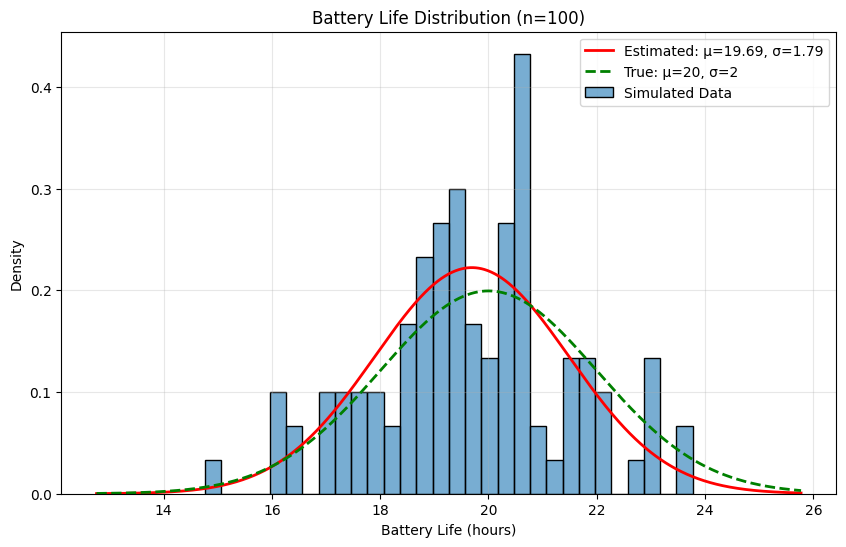

Sample size n1 = 100
MLE Mean: 19.6928 (True: 20)
MLE Std Dev: 1.7939 (True: 2)
--------------------------------------------------


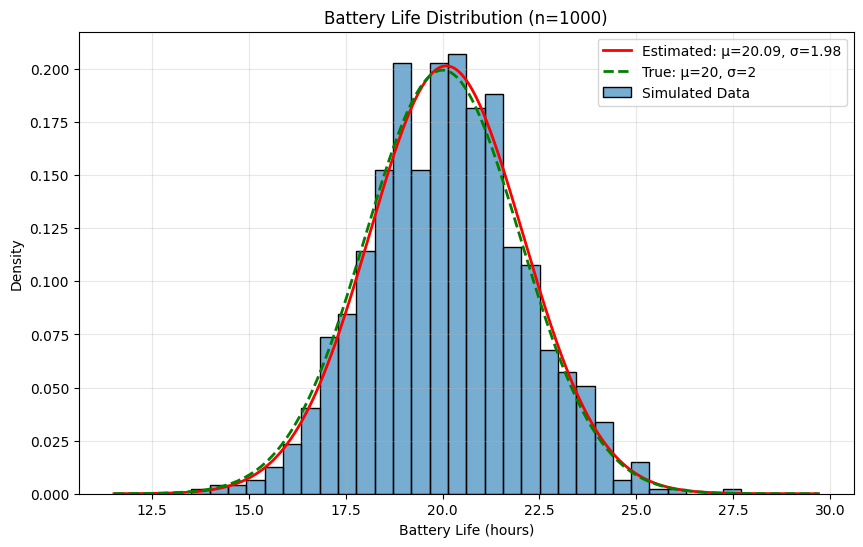

Sample size n1 = 1000
MLE Mean: 20.0944 (True: 20)
MLE Std Dev: 1.9800 (True: 2)
--------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def mle_normal(data):
    n = len(data)
    mean_est = np.mean(data)
    var_est = np.sum((data - mean_est) ** 2) / n
    std_est = np.sqrt(var_est)

    return mean_est, std_est

def plot_histogram_with_pdf(data, mean_est, std_est, true_mean=20, true_std=2):
    plt.figure(figsize=(10, 6))

    sns.histplot(data, kde=False, stat='density', bins=30, alpha=0.6, label='Simulated Data')

    x = np.linspace(min(data) - 2, max(data) + 2, 1000)

    estimated_pdf = stats.norm.pdf(x, mean_est, std_est)
    plt.plot(x, estimated_pdf, 'r-', linewidth=2, label=f'Estimated: μ={mean_est:.2f}, σ={std_est:.2f}')

    true_pdf = stats.norm.pdf(x, true_mean, true_std)
    plt.plot(x, true_pdf, 'g--', linewidth=2, label=f'True: μ={true_mean}, σ={true_std}')

    plt.title(f'Battery Life Distribution (n={len(data)})')
    plt.xlabel('Battery Life (hours)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

n1_values = [10, 100, 1000]
for n1 in n1_values:
    battery_data = np.random.normal(20, 2, n1)

    mean_est, std_est = mle_normal(battery_data)

    plot_histogram_with_pdf(battery_data, mean_est, std_est)

    print(f"Sample size n1 = {n1}")
    print(f"MLE Mean: {mean_est:.4f} (True: 20)")
    print(f"MLE Std Dev: {std_est:.4f} (True: 2)")
    print("-" * 50)

## Part (ii)

Testing different combinations of n1 and n2:

Analyzing with n1=10, n2=100


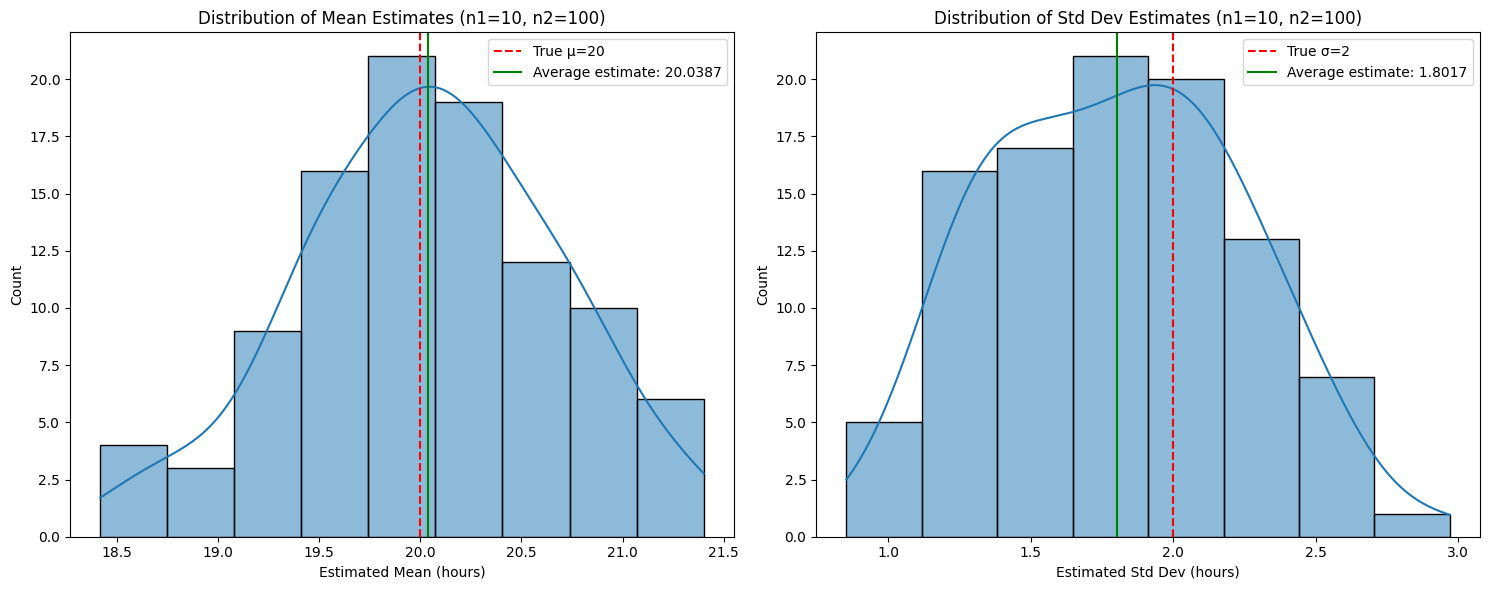

Mean estimator bias: 0.038664
Std Dev estimator bias: -0.198264
Mean estimator standard error: 0.631402
Std Dev estimator standard error: 0.438877

Analyzing with n1=10, n2=1000


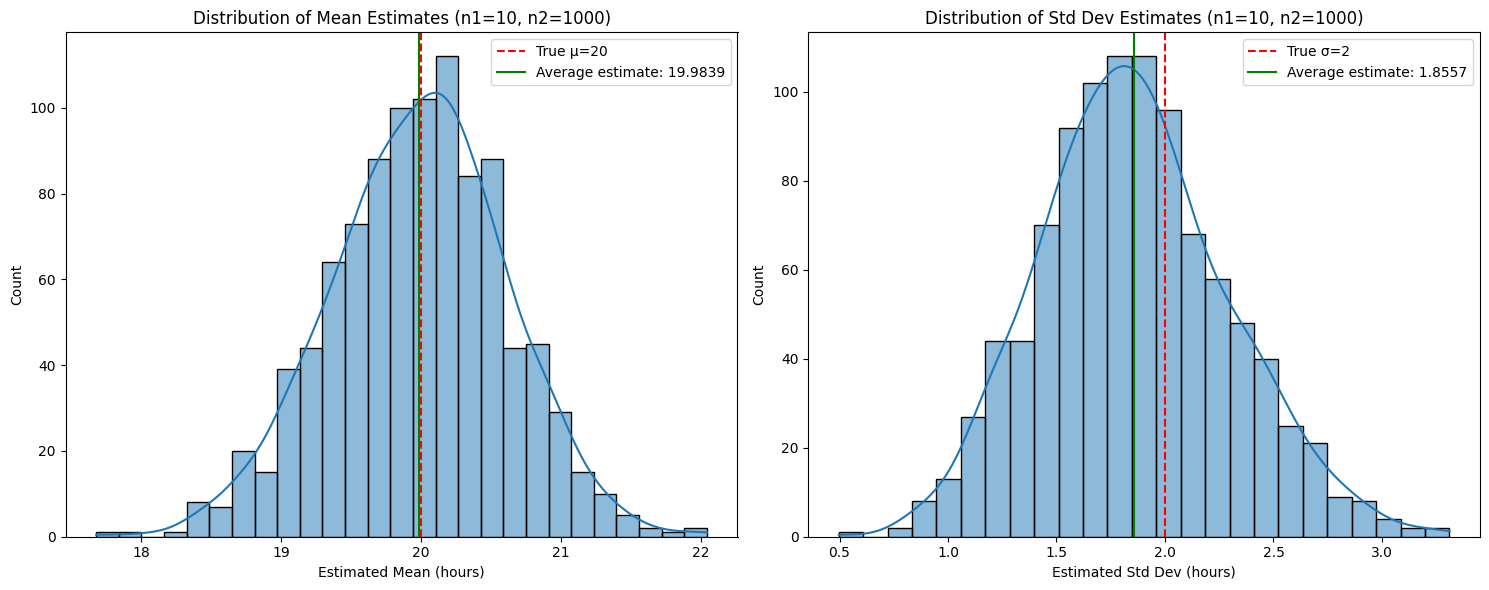

Mean estimator bias: -0.016120
Std Dev estimator bias: -0.144277
Mean estimator standard error: 0.623950
Std Dev estimator standard error: 0.433912

Analyzing with n1=100, n2=100


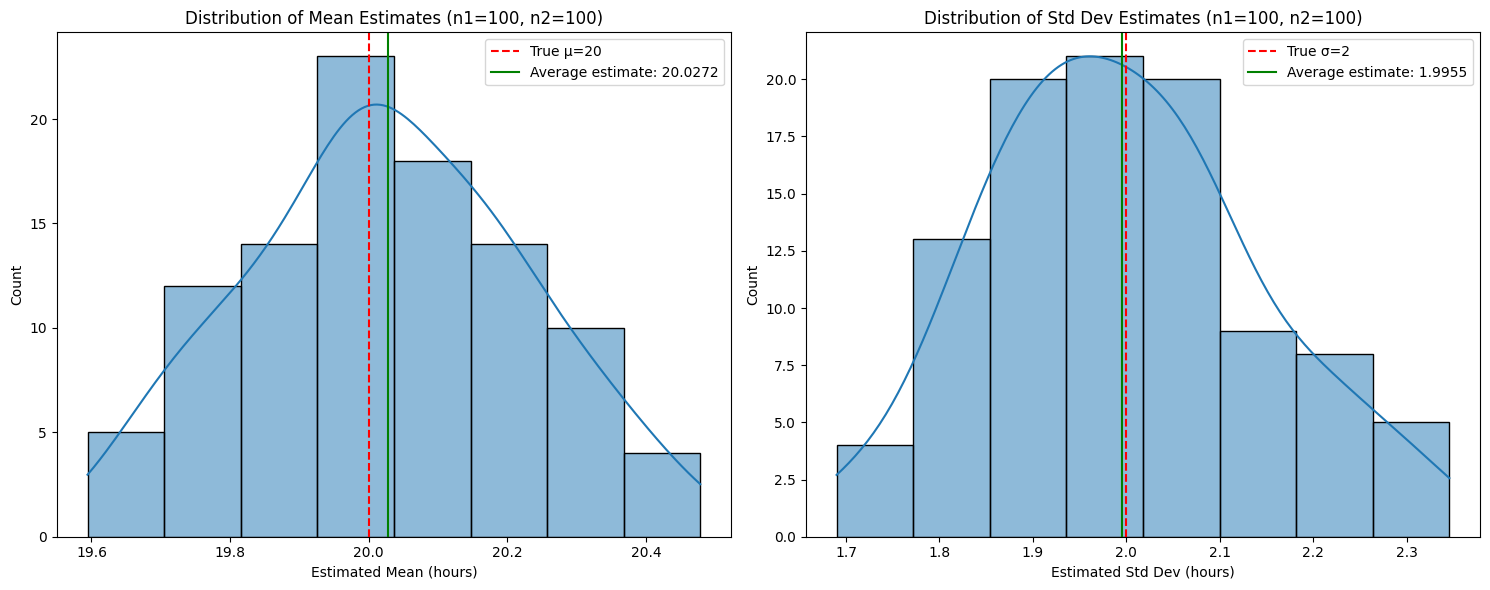

Mean estimator bias: 0.027200
Std Dev estimator bias: -0.004536
Mean estimator standard error: 0.198197
Std Dev estimator standard error: 0.144111

Analyzing with n1=100, n2=1000


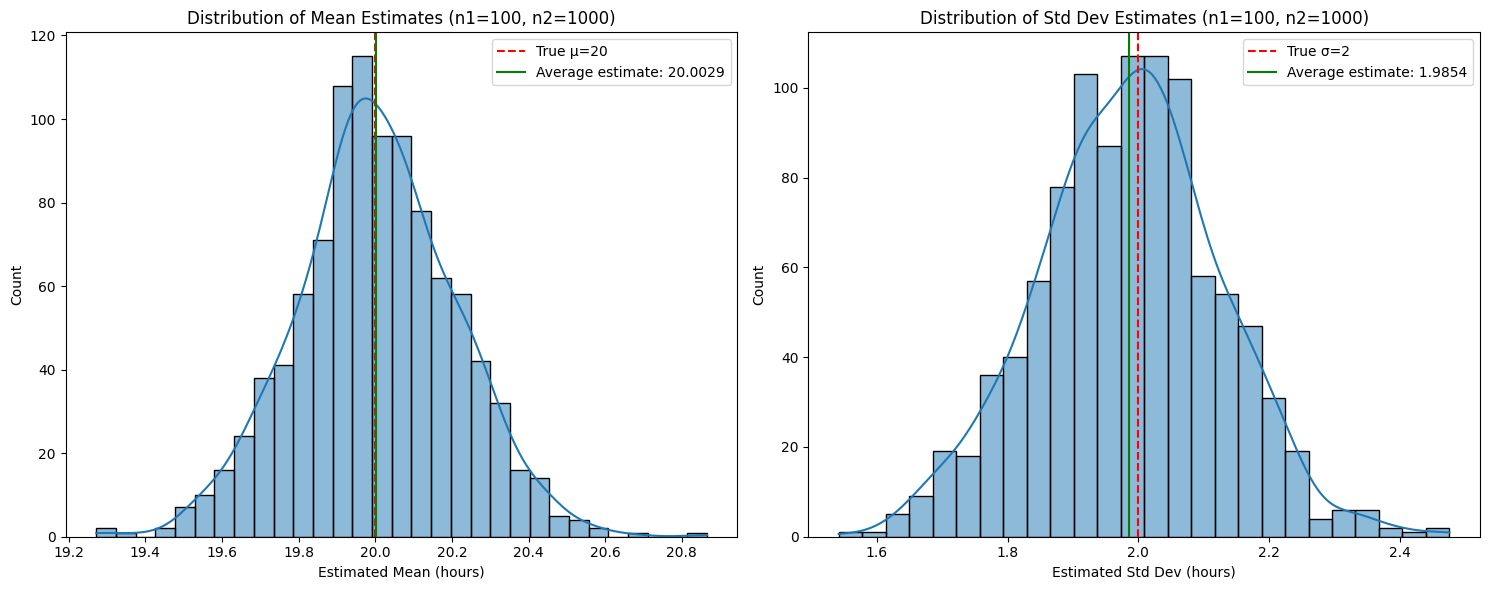

Mean estimator bias: 0.002858
Std Dev estimator bias: -0.014612
Mean estimator standard error: 0.206798
Std Dev estimator standard error: 0.140298

Analyzing with n1=1000, n2=100


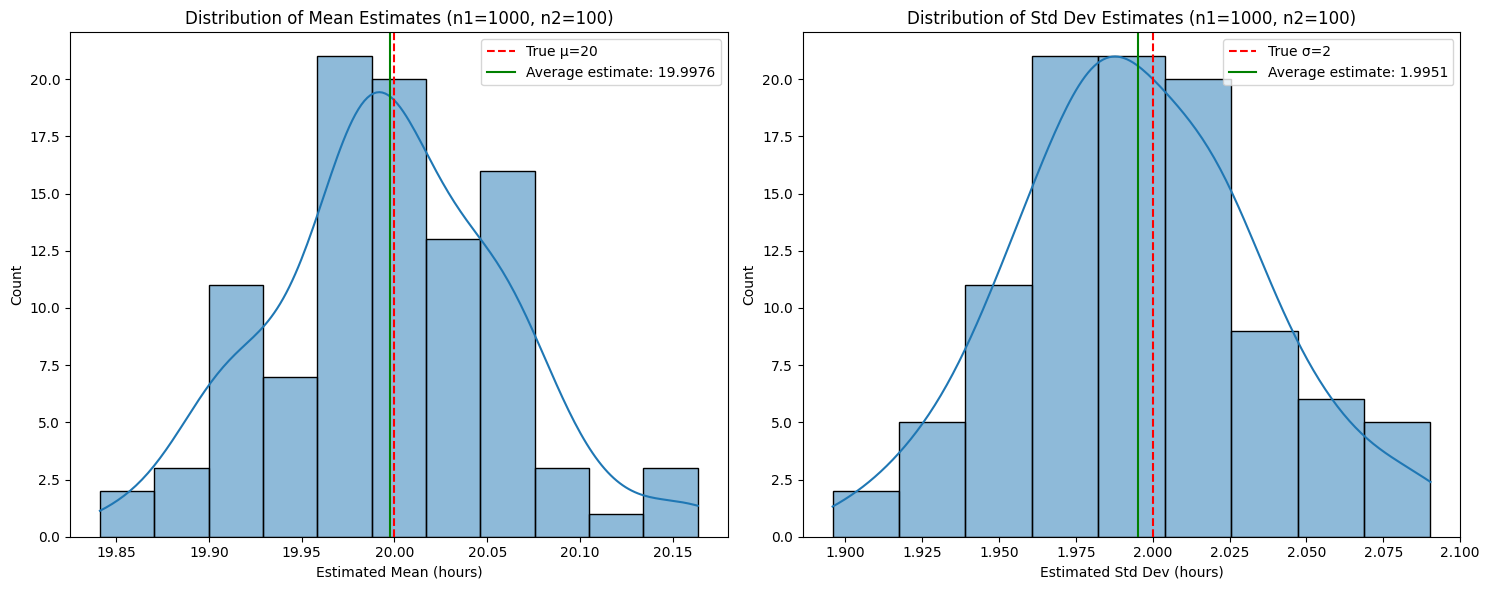

Mean estimator bias: -0.002437
Std Dev estimator bias: -0.004899
Mean estimator standard error: 0.062396
Std Dev estimator standard error: 0.039491

Analyzing with n1=1000, n2=1000


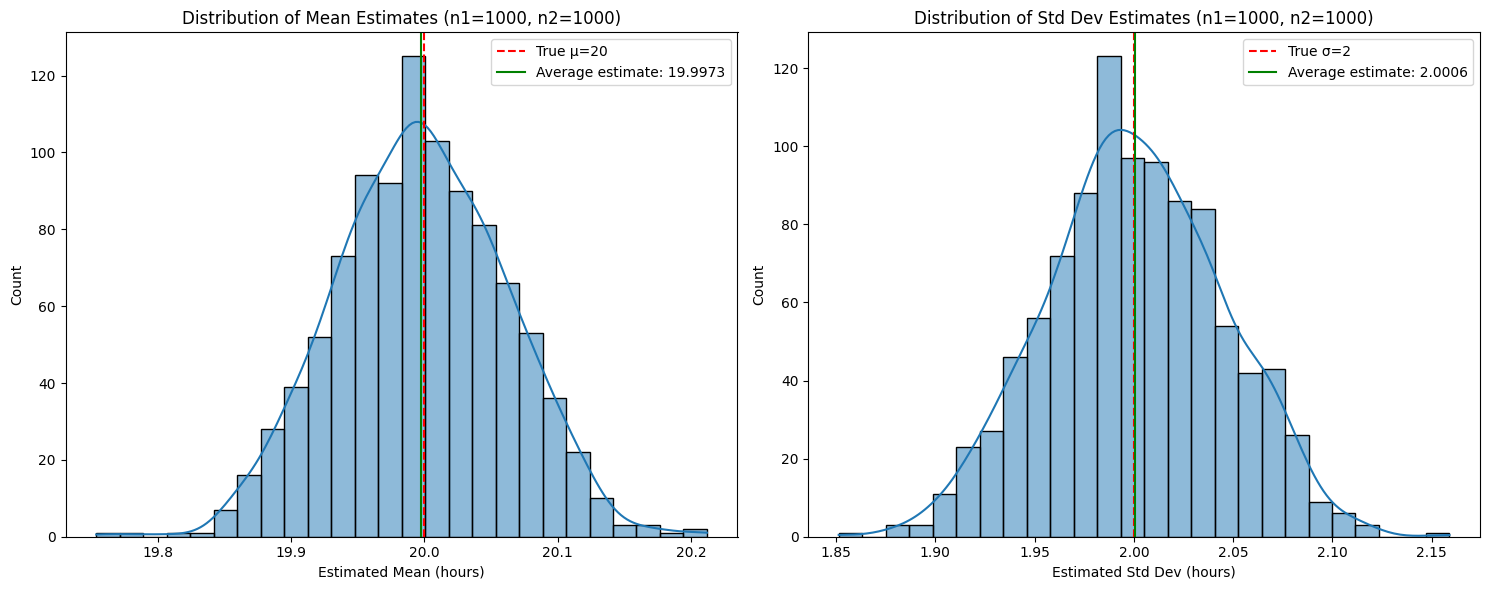

Mean estimator bias: -0.002698
Std Dev estimator bias: 0.000564
Mean estimator standard error: 0.063695
Std Dev estimator standard error: 0.044479

Studying effect of n2 with fixed n1=100:


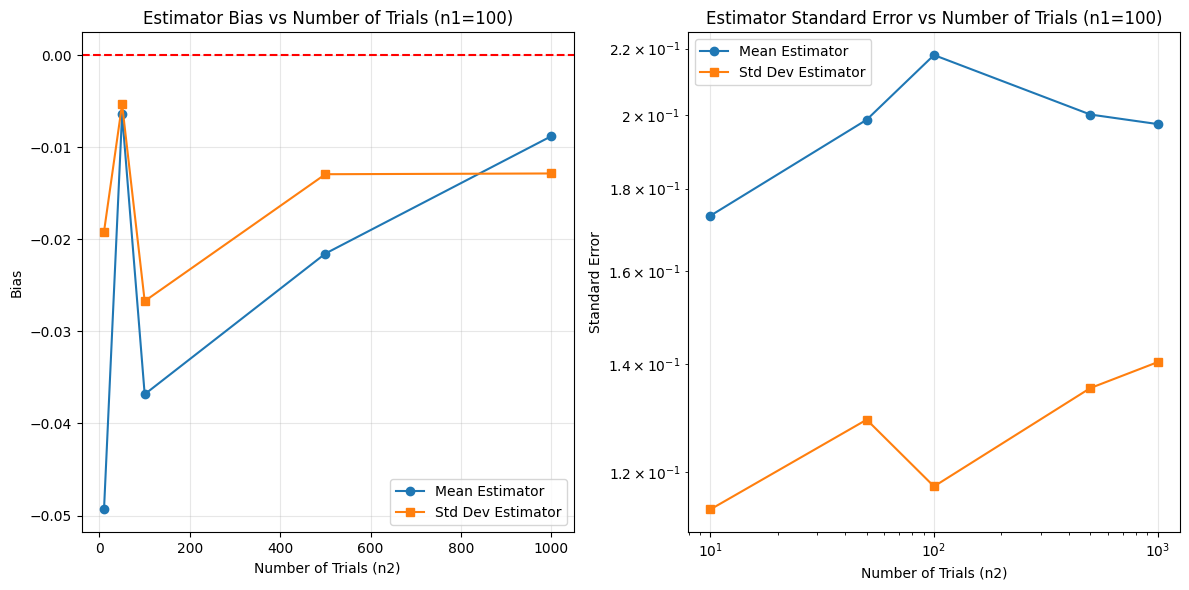

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def mle_normal(data):
    n = len(data)
    mean_est = np.mean(data)
    var_est = np.sum((data - mean_est) ** 2) / n
    std_est = np.sqrt(var_est)

    return mean_est, std_est

def run_simulation_part2(n1, n2, true_mean=20, true_std=2):
    mean_estimates = np.zeros(n2)
    std_estimates = np.zeros(n2)

    for i in range(n2):
        battery_data = np.random.normal(true_mean, true_std, n1)

        n = len(battery_data)
        mean_est = np.mean(battery_data)
        var_est = np.sum((battery_data - mean_est) ** 2) / n
        std_est = np.sqrt(var_est)

        mean_estimates[i] = mean_est
        std_estimates[i] = std_est

    return mean_estimates, std_estimates

def plot_parameter_distributions(mean_estimates, std_estimates, n1, n2, true_mean=20, true_std=2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.histplot(mean_estimates, kde=True, ax=ax1)
    ax1.axvline(true_mean, color='r', linestyle='--', label=f'True μ={true_mean}')
    ax1.axvline(np.mean(mean_estimates), color='g', linestyle='-',
               label=f'Average estimate: {np.mean(mean_estimates):.4f}')
    ax1.set_title(f'Distribution of Mean Estimates (n1={n1}, n2={n2})')
    ax1.set_xlabel('Estimated Mean (hours)')
    ax1.legend()

    sns.histplot(std_estimates, kde=True, ax=ax2)
    ax2.axvline(true_std, color='r', linestyle='--', label=f'True σ={true_std}')
    ax2.axvline(np.mean(std_estimates), color='g', linestyle='-',
               label=f'Average estimate: {np.mean(std_estimates):.4f}')
    ax2.set_title(f'Distribution of Std Dev Estimates (n1={n1}, n2={n2})')
    ax2.set_xlabel('Estimated Std Dev (hours)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    mean_bias = np.mean(mean_estimates) - true_mean
    std_bias = np.mean(std_estimates) - true_std

    print(f"Mean estimator bias: {mean_bias:.6f}")
    print(f"Std Dev estimator bias: {std_bias:.6f}")
    print(f"Mean estimator standard error: {np.std(mean_estimates, ddof=1):.6f}")
    print(f"Std Dev estimator standard error: {np.std(std_estimates, ddof=1):.6f}")
n1_values = [10, 100, 1000]
n2_values = [100, 1000]

print("Testing different combinations of n1 and n2:")
for n1 in n1_values:
    for n2 in n2_values:
        print(f"\nAnalyzing with n1={n1}, n2={n2}")

        mean_estimates, std_estimates = run_simulation_part2(n1, n2)

        plot_parameter_distributions(mean_estimates, std_estimates, n1, n2)
fixed_n1 = 100
n2_values_extended = [10, 50, 100, 500, 1000]

print(f"\nStudying effect of n2 with fixed n1={fixed_n1}:")
mean_biases = []
std_biases = []
mean_std_errors = []
std_std_errors = []

for n2 in n2_values_extended:
    mean_estimates, std_estimates = run_simulation_part2(fixed_n1, n2)

    mean_bias = np.mean(mean_estimates) - 20
    std_bias = np.mean(std_estimates) - 2
    mean_std_error = np.std(mean_estimates, ddof=1)
    std_std_error = np.std(std_estimates, ddof=1)

    mean_biases.append(mean_bias)
    std_biases.append(std_bias)
    mean_std_errors.append(mean_std_error)
    std_std_errors.append(std_std_error)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n2_values_extended, mean_biases, 'o-', label='Mean Estimator')
plt.plot(n2_values_extended, std_biases, 's-', label='Std Dev Estimator')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Number of Trials (n2)')
plt.ylabel('Bias')
plt.title(f'Estimator Bias vs Number of Trials (n1={fixed_n1})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.plot(n2_values_extended, mean_std_errors, 'o-', label='Mean Estimator')
plt.plot(n2_values_extended, std_std_errors, 's-', label='Std Dev Estimator')
plt.xlabel('Number of Trials (n2)')
plt.ylabel('Standard Error')
plt.title(f'Estimator Standard Error vs Number of Trials (n1={fixed_n1})')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Question 2

## Part 1

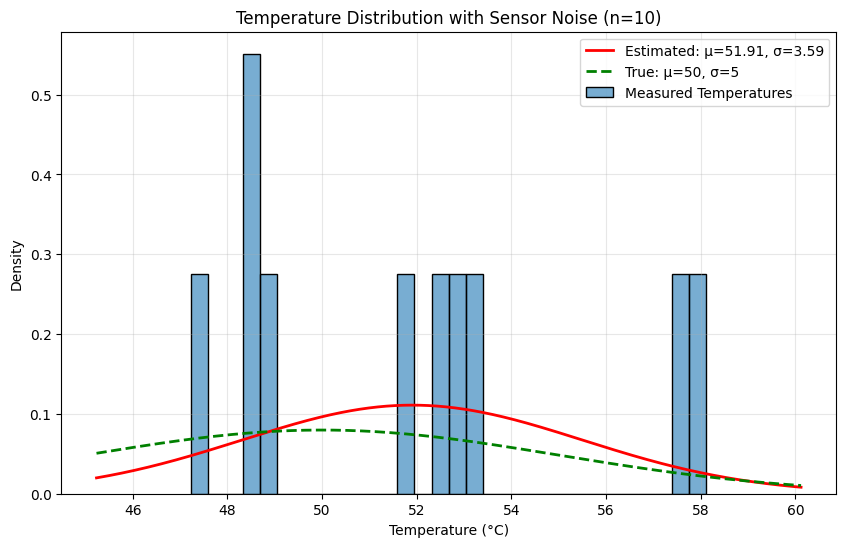

Sample size n1 = 10
MLE Mean: 51.9058 (True: 50)
MLE Std Dev: 3.5942 (True: 5)
--------------------------------------------------


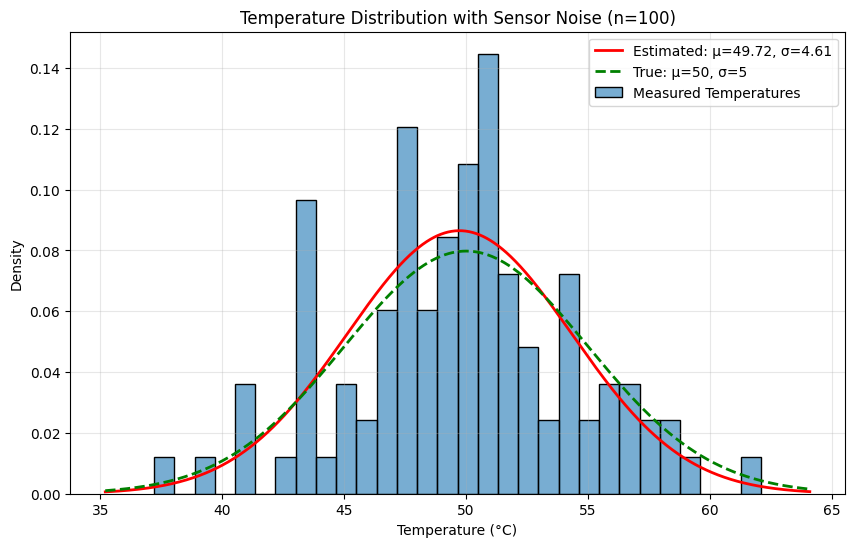

Sample size n1 = 100
MLE Mean: 49.7249 (True: 50)
MLE Std Dev: 4.6122 (True: 5)
--------------------------------------------------


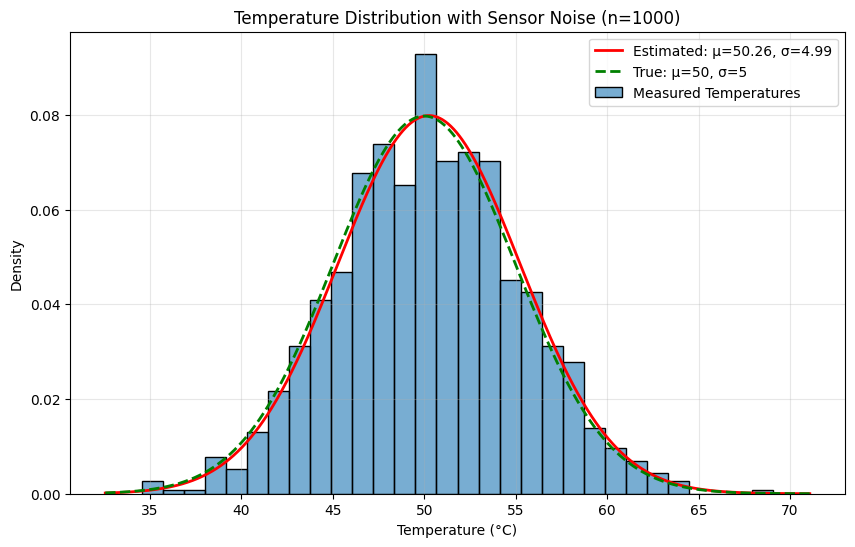

Sample size n1 = 1000
MLE Mean: 50.2585 (True: 50)
MLE Std Dev: 4.9936 (True: 5)
--------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def add_sensor_noise(true_temps):
    noise = np.random.uniform(-1, 1, len(true_temps))
    return true_temps + noise

def mle_normal(data):
    n = len(data)
    mean_est = np.mean(data)
    var_est = np.sum((data - mean_est) ** 2) / n
    std_est = np.sqrt(var_est)

    return mean_est, std_est

def plot_histogram_with_pdf(data, mean_est, std_est, true_mean=50, true_std=5, bins=30):
    plt.figure(figsize=(10, 6))

    sns.histplot(data, kde=False, stat='density', bins=bins, alpha=0.6, label='Measured Temperatures')

    x = np.linspace(min(data) - 2, max(data) + 2, 1000)

    estimated_pdf = stats.norm.pdf(x, mean_est, std_est)
    plt.plot(x, estimated_pdf, 'r-', linewidth=2, label=f'Estimated: μ={mean_est:.2f}, σ={std_est:.2f}')

    true_pdf = stats.norm.pdf(x, true_mean, true_std)
    plt.plot(x, true_pdf, 'g--', linewidth=2, label=f'True: μ={true_mean}, σ={true_std}')

    plt.title(f'Temperature Distribution with Sensor Noise (n={len(data)})')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
n1_values = [10, 100, 1000]

for n1 in n1_values:
    true_temperatures = np.random.normal(50, 5, n1)

    measured_temperatures = add_sensor_noise(true_temperatures)

    mean_est, std_est = mle_normal(measured_temperatures)

    plot_histogram_with_pdf(measured_temperatures, mean_est, std_est)

    print(f"Sample size n1 = {n1}")
    print(f"MLE Mean: {mean_est:.4f} (True: 50)")
    print(f"MLE Std Dev: {std_est:.4f} (True: 5)")
    print("-" * 50)

## Part 2

Testing different combinations of n1 and n2:

Analyzing with n1=10, n2=100


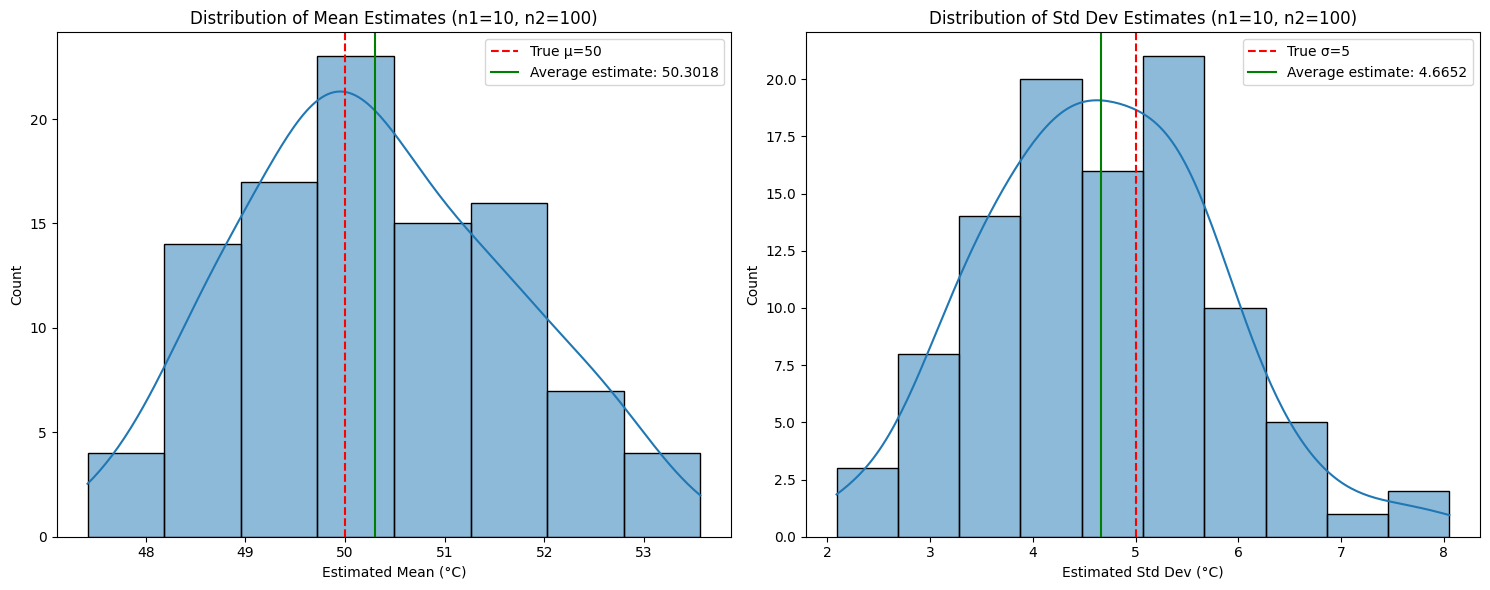

Mean estimator bias: 0.301849
Std Dev estimator bias: -0.334840
Mean estimator standard error: 1.342640
Std Dev estimator standard error: 1.130013

Analyzing with n1=10, n2=1000


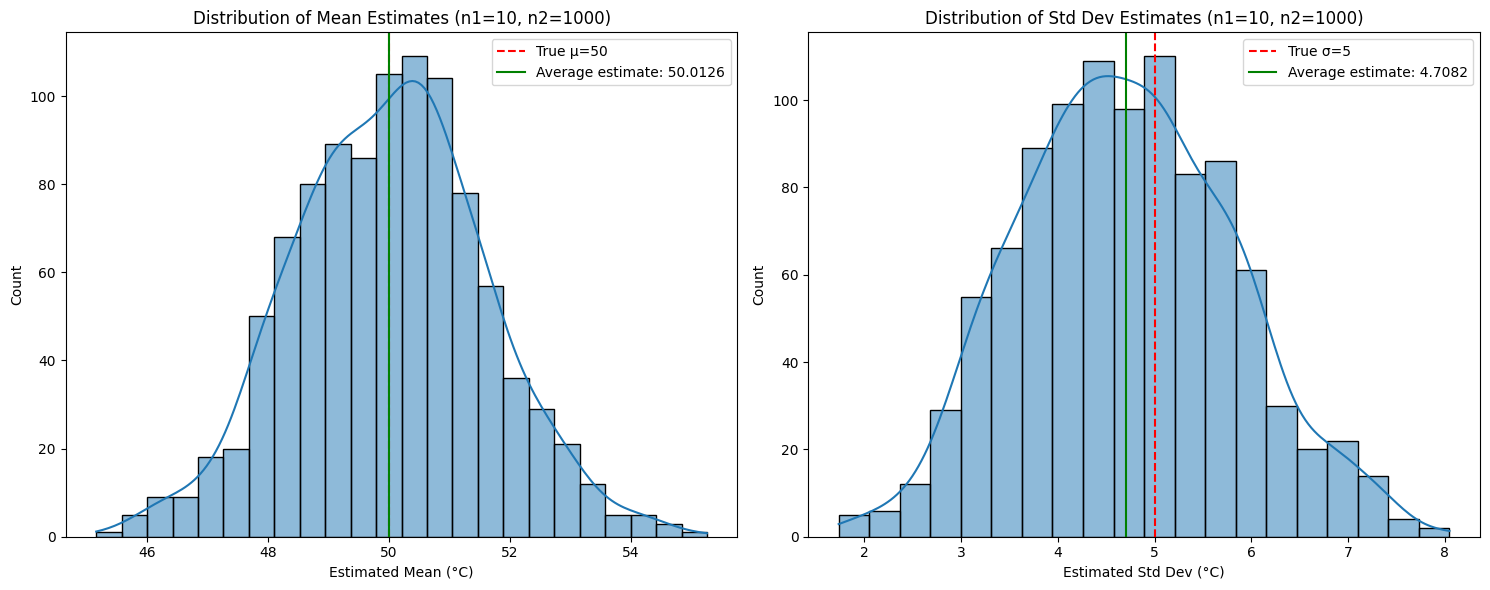

Mean estimator bias: 0.012634
Std Dev estimator bias: -0.291814
Mean estimator standard error: 1.592648
Std Dev estimator standard error: 1.107468

Analyzing with n1=100, n2=100


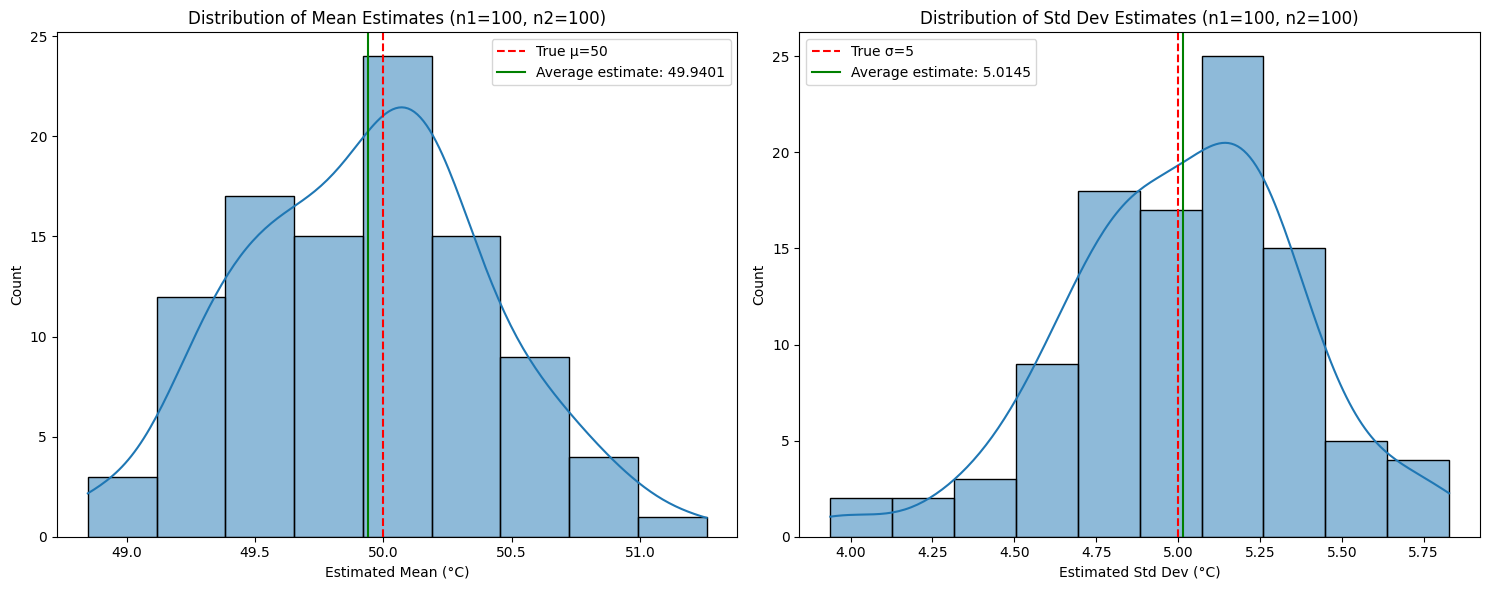

Mean estimator bias: -0.059866
Std Dev estimator bias: 0.014548
Mean estimator standard error: 0.479661
Std Dev estimator standard error: 0.355669

Analyzing with n1=100, n2=1000


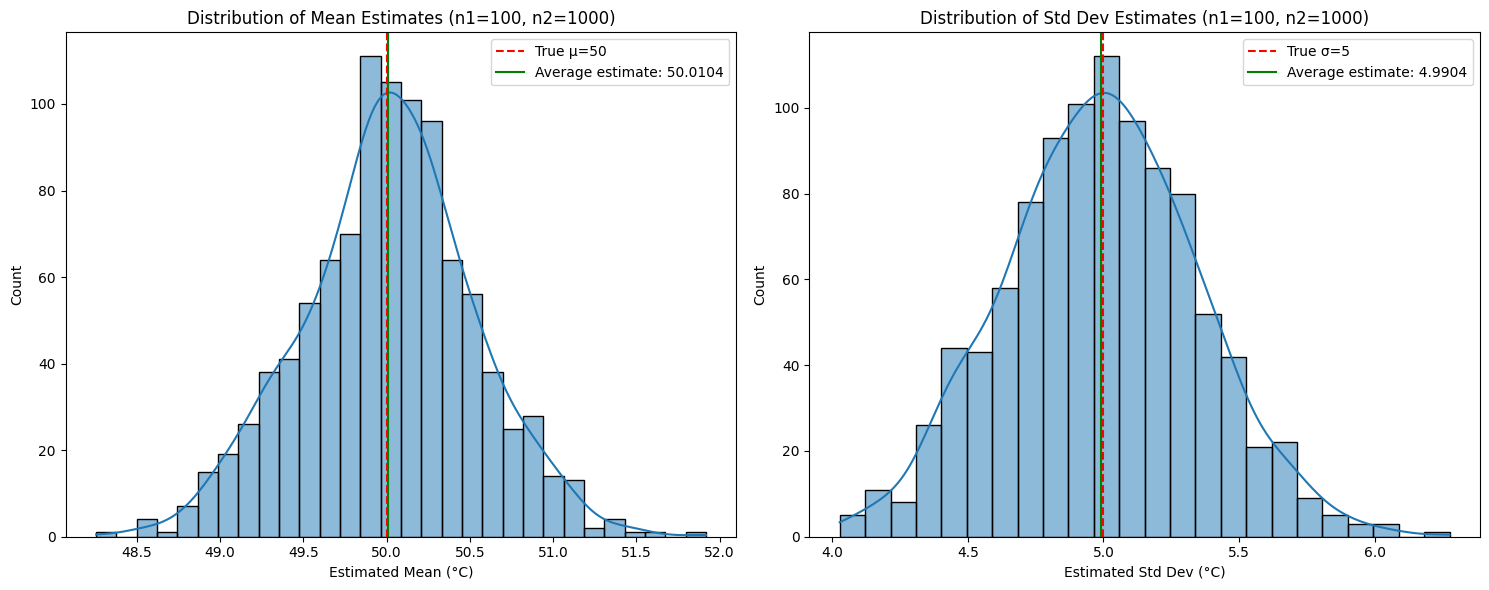

Mean estimator bias: 0.010384
Std Dev estimator bias: -0.009605
Mean estimator standard error: 0.513854
Std Dev estimator standard error: 0.356773

Analyzing with n1=1000, n2=100


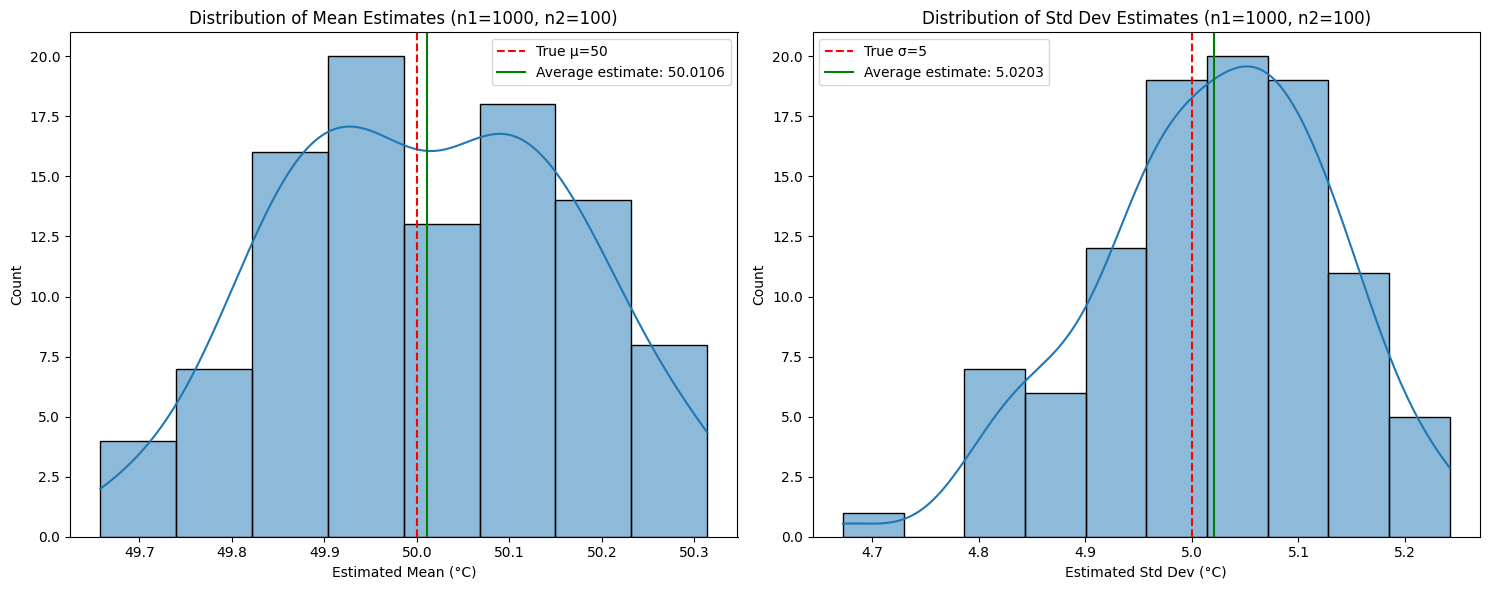

Mean estimator bias: 0.010561
Std Dev estimator bias: 0.020331
Mean estimator standard error: 0.154481
Std Dev estimator standard error: 0.108637

Analyzing with n1=1000, n2=1000


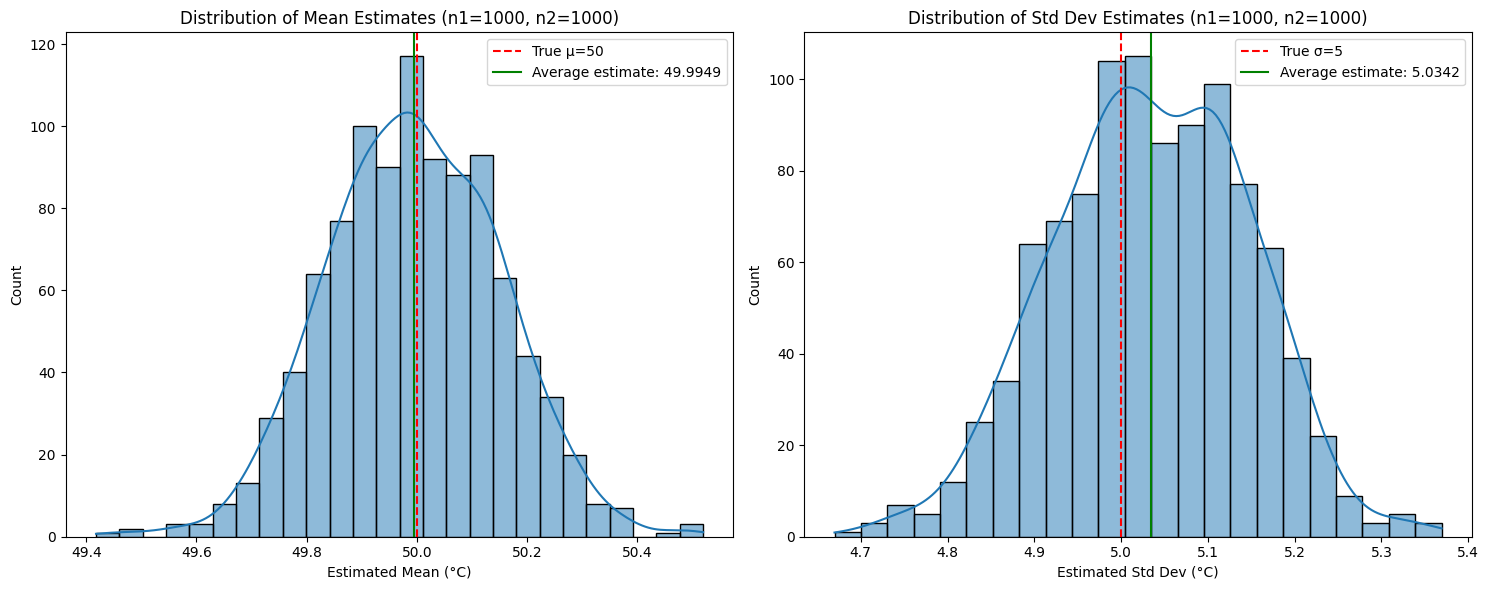

Mean estimator bias: -0.005059
Std Dev estimator bias: 0.034196
Mean estimator standard error: 0.155683
Std Dev estimator standard error: 0.112470

Comparing the effect of sensor noise on variance estimation:
Std Dev estimator bias with noise: -0.002752
Theoretical std dev with noise: 5.033223
Expected std dev estimator bias: -0.035975


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def simulate_true_temperature(n, mean=50, std=5):
    return np.random.normal(mean, std, n)

def add_sensor_noise(true_temps):
    noise = np.random.uniform(-1, 1, len(true_temps))
    return true_temps + noise

def mle_normal(data):
    n = len(data)
    mean_est = np.mean(data)
    var_est = np.sum((data - mean_est) ** 2) / n
    std_est = np.sqrt(var_est)

    return mean_est, std_est

def run_simulation(n1, n2, true_mean=50, true_std=5):
    mean_estimates = np.zeros(n2)
    std_estimates = np.zeros(n2)

    for i in range(n2):
        true_temperatures = np.random.normal(50, 5, n1)
        measured_temperatures = add_sensor_noise(true_temperatures)
        mean_est, std_est = mle_normal(measured_temperatures)

        mean_estimates[i] = mean_est
        std_estimates[i] = std_est

    return mean_estimates, std_estimates

def plot_parameter_distributions(mean_estimates, std_estimates, n1, n2, true_mean=50, true_std=5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.histplot(mean_estimates, kde=True, ax=ax1)
    ax1.axvline(true_mean, color='r', linestyle='--', label=f'True μ={true_mean}')
    ax1.axvline(np.mean(mean_estimates), color='g', linestyle='-',
               label=f'Average estimate: {np.mean(mean_estimates):.4f}')
    ax1.set_title(f'Distribution of Mean Estimates (n1={n1}, n2={n2})')
    ax1.set_xlabel('Estimated Mean (°C)')
    ax1.legend()

    sns.histplot(std_estimates, kde=True, ax=ax2)
    ax2.axvline(true_std, color='r', linestyle='--', label=f'True σ={true_std}')
    ax2.axvline(np.mean(std_estimates), color='g', linestyle='-',
               label=f'Average estimate: {np.mean(std_estimates):.4f}')
    ax2.set_title(f'Distribution of Std Dev Estimates (n1={n1}, n2={n2})')
    ax2.set_xlabel('Estimated Std Dev (°C)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    mean_bias = np.mean(mean_estimates) - true_mean
    std_bias = np.mean(std_estimates) - true_std

    print(f"Mean estimator bias: {mean_bias:.6f}")
    print(f"Std Dev estimator bias: {std_bias:.6f}")
    print(f"Mean estimator standard error: {np.std(mean_estimates, ddof=1):.6f}")
    print(f"Std Dev estimator standard error: {np.std(std_estimates, ddof=1):.6f}")

n1_values = [10, 100, 1000]
n2_values = [100, 1000]

print("Testing different combinations of n1 and n2:")
for n1 in n1_values:
    for n2 in n2_values:
        print(f"\nAnalyzing with n1={n1}, n2={n2}")

        mean_estimates, std_estimates = run_simulation(n1, n2)

        plot_parameter_distributions(mean_estimates, std_estimates, n1, n2)

print("\nComparing the effect of sensor noise on variance estimation:")
n1 = 100
n2 = 1000

mean_estimates_noisy, std_estimates_noisy = run_simulation(n1, n2)
std_bias_noisy = np.mean(std_estimates_noisy) - 5
print(f"Std Dev estimator bias with noise: {std_bias_noisy:.6f}")

theoretical_std = np.sqrt(5**2 + 1/3)
print(f"Theoretical std dev with noise: {theoretical_std:.6f}")
print(f"Expected std dev estimator bias: {np.mean(std_estimates_noisy) - theoretical_std:.6f}")

# Question 3

True parameters: μ = 0.001000, σ = 0.020000
MLE estimates: μ̂ = 0.000996, σ̂ = 0.025814


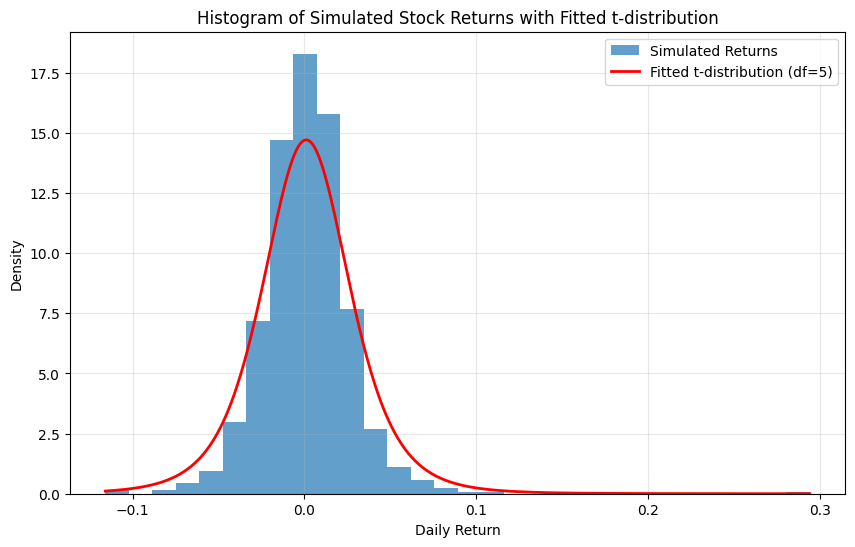

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

np.random.seed(42)

true_mean = 0.001
true_std = 0.02
n1 = 1000
df = 5

X = true_std * stats.t.rvs(df=df, size=n1) + true_mean

estimated_mean = np.mean(X)
estimated_std = np.std(X, ddof=1)

print(f"True parameters: μ = {true_mean:.6f}, σ = {true_std:.6f}")
print(f"MLE estimates: μ̂ = {estimated_mean:.6f}, σ̂ = {estimated_std:.6f}")

plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, density=True, alpha=0.7, label='Simulated Returns')

x = np.linspace(min(X), max(X), 1000)

scaled_pdf = stats.t.pdf((x - estimated_mean) / estimated_std, df) / estimated_std

plt.plot(x, scaled_pdf, 'r-', lw=2, label=f'Fitted t-distribution (df={df})')
plt.title('Histogram of Simulated Stock Returns with Fitted t-distribution')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== Comparison of Estimates ===
True parameters: μ = 0.001000, σ = 0.020000

Pure t-distribution:
Estimated: μ̂ = 0.000996, σ̂ = 0.025814
Bias in μ: -0.000004
Bias in σ: 0.005814

Noisy t-distribution:
Estimated: μ̂ = 0.000861, σ̂ = 0.026004
Bias in μ: -0.000139
Bias in σ: 0.006004


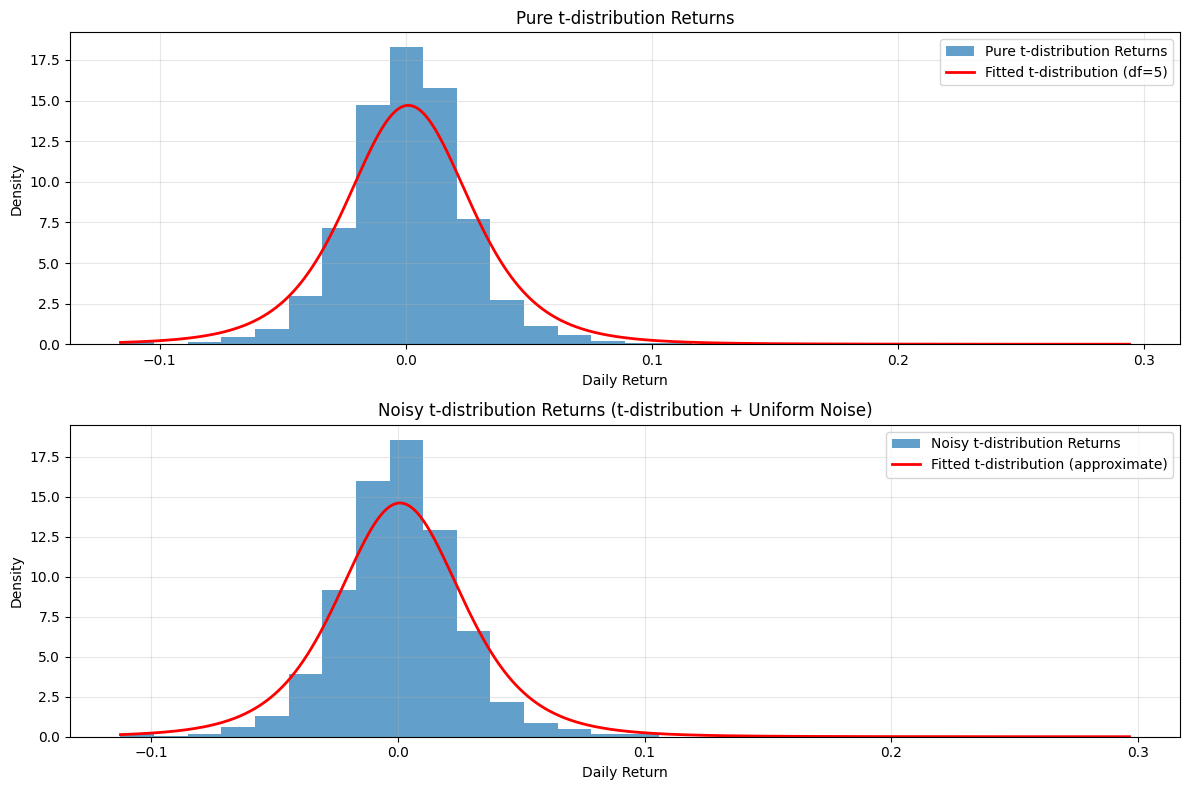


=== Theoretical Analysis ===
Variance of t-distribution with df=5: 0.0006666666666666668
Variance of uniform noise: 0.00000833
Theoretical variance of noisy returns: 0.000675
Theoretical std of noisy returns: 0.02598076211353316


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

np.random.seed(42)

true_mean = 0.001
true_std = 0.02
n1 = 1000
df = 5

X = true_std * stats.t.rvs(df=df, size=n1) + true_mean

estimated_mean_t = np.mean(X)
estimated_std_t = np.std(X, ddof=1)

noise = np.random.uniform(-0.005, 0.005, n1)

Y = X + noise

estimated_mean_noisy = np.mean(Y)
estimated_std_noisy = np.std(Y, ddof=1)

print("=== Comparison of Estimates ===")
print(f"True parameters: μ = {true_mean:.6f}, σ = {true_std:.6f}")
print("\nPure t-distribution:")
print(f"Estimated: μ̂ = {estimated_mean_t:.6f}, σ̂ = {estimated_std_t:.6f}")
print(f"Bias in μ: {estimated_mean_t - true_mean:.6f}")
print(f"Bias in σ: {estimated_std_t - true_std:.6f}")

print("\nNoisy t-distribution:")
print(f"Estimated: μ̂ = {estimated_mean_noisy:.6f}, σ̂ = {estimated_std_noisy:.6f}")
print(f"Bias in μ: {estimated_mean_noisy - true_mean:.6f}")
print(f"Bias in σ: {estimated_std_noisy - true_std:.6f}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(X, bins=30, density=True, alpha=0.7, label='Pure t-distribution Returns')
x = np.linspace(min(X), max(X), 1000)
scaled_pdf_t = stats.t.pdf((x - estimated_mean_t) / estimated_std_t, df) / estimated_std_t
plt.plot(x, scaled_pdf_t, 'r-', lw=2, label=f'Fitted t-distribution (df={df})')
plt.title('Pure t-distribution Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.hist(Y, bins=30, density=True, alpha=0.7, label='Noisy t-distribution Returns')

x = np.linspace(min(Y), max(Y), 1000)
scaled_pdf_noisy = stats.t.pdf((x - estimated_mean_noisy) / estimated_std_noisy, df) / estimated_std_noisy
plt.plot(x, scaled_pdf_noisy, 'r-', lw=2, label='Fitted t-distribution (approximate)')
plt.title('Noisy t-distribution Returns (t-distribution + Uniform Noise)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

theoretical_variance_t = (true_std**2) * (df/(df-2)) if df > 2 else "Undefined"
uniform_variance = (0.005 - (-0.005))**2 / 12
theoretical_variance_noisy = (true_std**2) * (df/(df-2)) + uniform_variance if df > 2 else "Undefined + uniform variance"
theoretical_std_noisy = np.sqrt((true_std**2) * (df/(df-2)) + uniform_variance) if df > 2 else "Undefined"

print("\n=== Theoretical Analysis ===")
print(f"Variance of t-distribution with df={df}: {theoretical_variance_t}")
print(f"Variance of uniform noise: {uniform_variance:.8f}")
print(f"Theoretical variance of noisy returns: {theoretical_variance_noisy}")
print(f"Theoretical std of noisy returns: {theoretical_std_noisy}")